# Tech Challenge


##Etapa 1 - Visão analítica da base de dados

###*1.1* Import Libs, Upload de arquivo e *Criação* do DF

Resumo: Importando todas as libs para criaçao do projeto

In [ ]:
#Recurso de abertura do arquivo Obesity.csv
#from google.colab import files

# Importação de bibliotecas essenciais para manipulação e análise de dados
import pandas as pd
import numpy as np

# Importação de bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Importação de bibliotecas para pré-processamento e machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Métricas de avaliação, ajuste conforme o problema (classificação ou regressão)
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.preprocessing import LabelBinarizer

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Exemplos de modelos comuns (escolha e importe os que você pretende usar)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LinearRegression # Exemplo para regressão
# from sklearn.tree import DecisionTreeRegressor # Exemplo para regressão
# from sklearn.ensemble import RandomForestRegressor # Exemplo para regressão


print("Bibliotecas importadas com sucesso!")

ModuleNotFoundError: No module named 'google'

In [ ]:
####Upload Google Colab
# uploaded = files.upload()

# # Upload de apenas um arquivo
# for filename in uploaded.keys():

def load_data(path='data/Obesity.csv'):
    df = pd.read_csv(path)
    return df

    print(f'Arquivo "{filename}" enviado com sucesso.')
    df = pd.read_csv(filename)
    print("DataFrame criado com sucesso!")
    display(df.head())  # Mostrar as primeiras linhas do DataFrame para verificar


Saving Obesity (1).csv to Obesity (1) (1).csv
Arquivo "Obesity (1) (1).csv" enviado com sucesso.
DataFrame criado com sucesso!


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

###*1.2* Análise descritiva e exploratória

Resumo:


In [ ]:
# Análise descritiva para colunas numéricas
display(df.describe())

# Análise descritiva para colunas categóricas
for column in df.select_dtypes(include='object').columns:
    print(f"\nContagem de valores para a coluna: {column}")
    display(df[column].value_counts())

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000



Contagem de valores para a coluna: Gender


,count
Gender,
Male,1068
Female,1043



Contagem de valores para a coluna: family_history


,count
family_history,
yes,1726
no,385



Contagem de valores para a coluna: FAVC


,count
FAVC,
yes,1866
no,245



Contagem de valores para a coluna: CAEC


,count
CAEC,
Sometimes,1765
Frequently,242
Always,53
no,51



Contagem de valores para a coluna: SMOKE


,count
SMOKE,
no,2067
yes,44



Contagem de valores para a coluna: SCC


,count
SCC,
no,2015
yes,96



Contagem de valores para a coluna: CALC


,count
CALC,
Sometimes,1401
no,639
Frequently,70
Always,1



Contagem de valores para a coluna: MTRANS


,count
MTRANS,
Public_Transportation,1580
Automobile,457
Walking,56
Motorbike,11
Bike,7



Contagem de valores para a coluna: Obesity


,count
Obesity,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


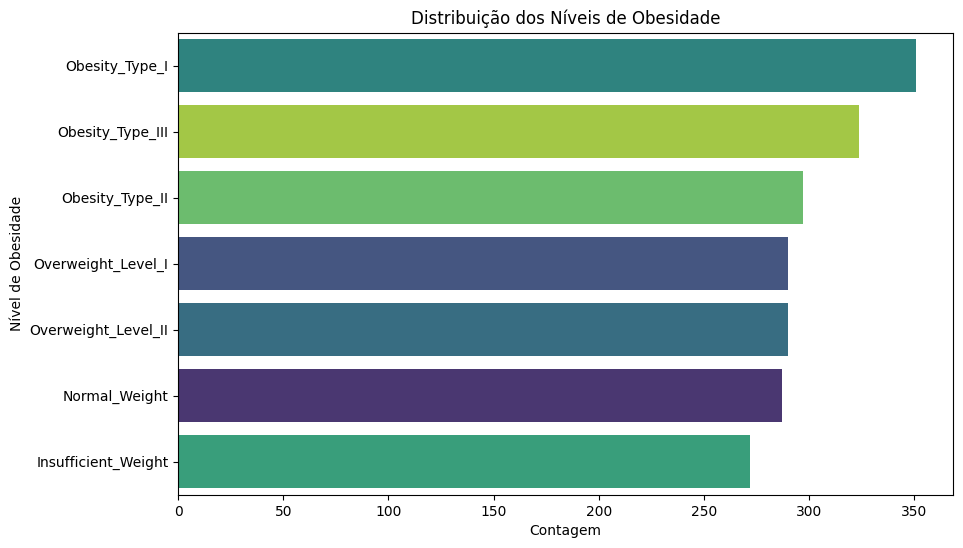

In [ ]:
# Distribuição da variável alvo 'Obesity'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Obesity', order=df['Obesity'].value_counts().index, palette='viridis', hue='Obesity', legend=False)
plt.title('Distribuição dos Níveis de Obesidade')
plt.xlabel('Contagem')
plt.ylabel('Nível de Obesidade')
plt.show()

Obs:

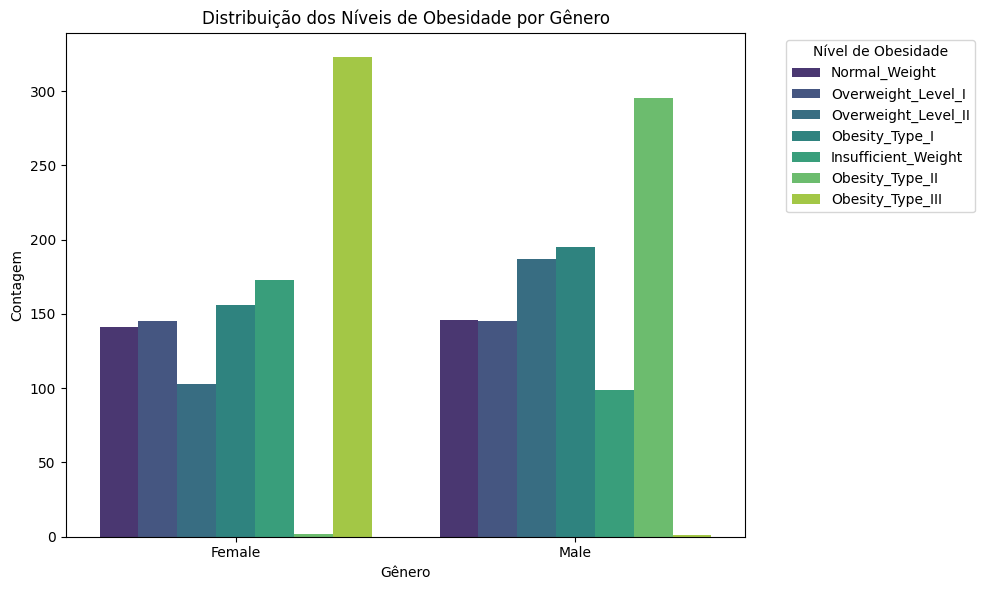

In [ ]:
# Relação entre 'Gender' e 'Obesity'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Obesity', palette='viridis')
plt.title('Distribuição dos Níveis de Obesidade por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.legend(title='Nível de Obesidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Obs:

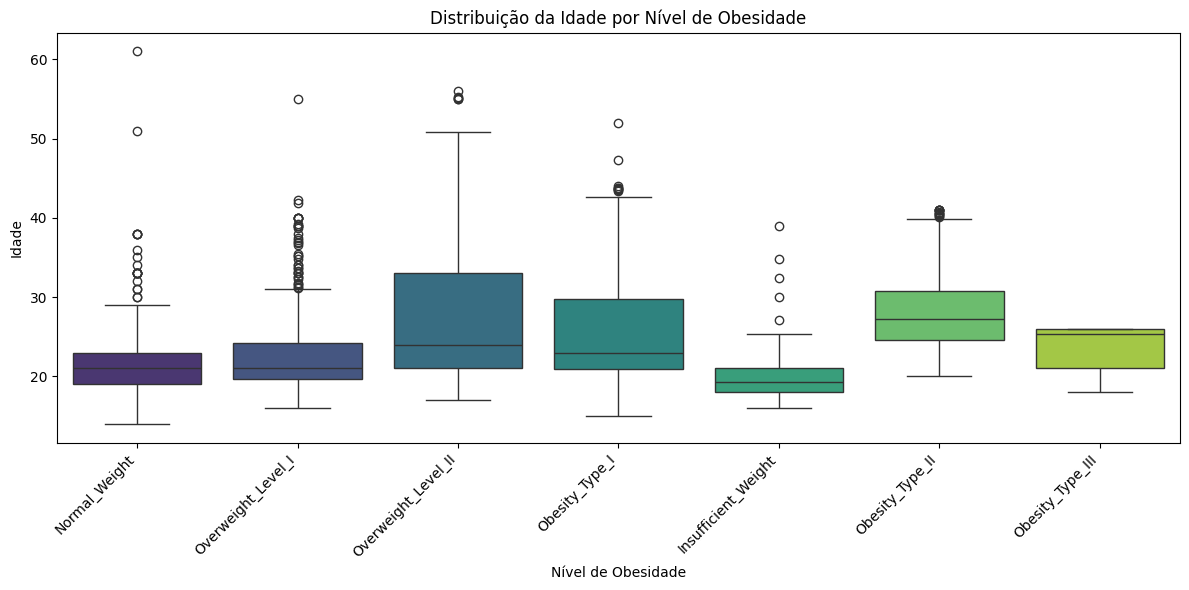

In [ ]:
# Distribuição de 'Age' por nível de 'Obesity'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Obesity', y='Age', palette='viridis', hue='Obesity', legend=False)
plt.title('Distribuição da Idade por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Idade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

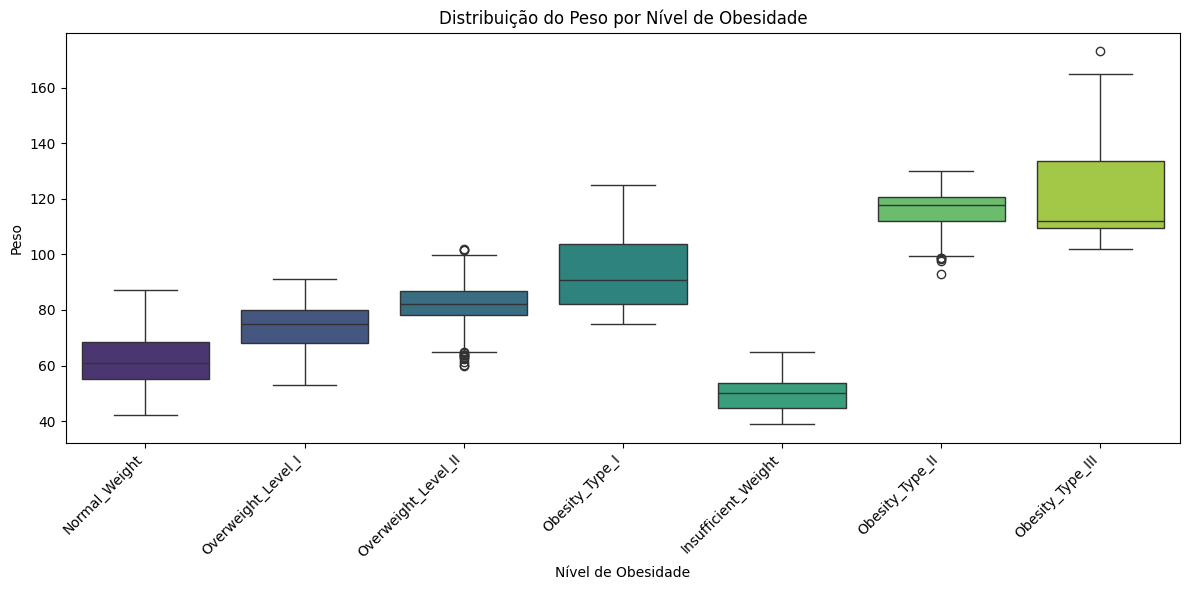

In [ ]:
# Distribuição de 'Weight' por nível de 'Obesity'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Obesity', y='Weight', palette='viridis', hue='Obesity', legend=False)
plt.title('Distribuição do Peso por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Peso')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

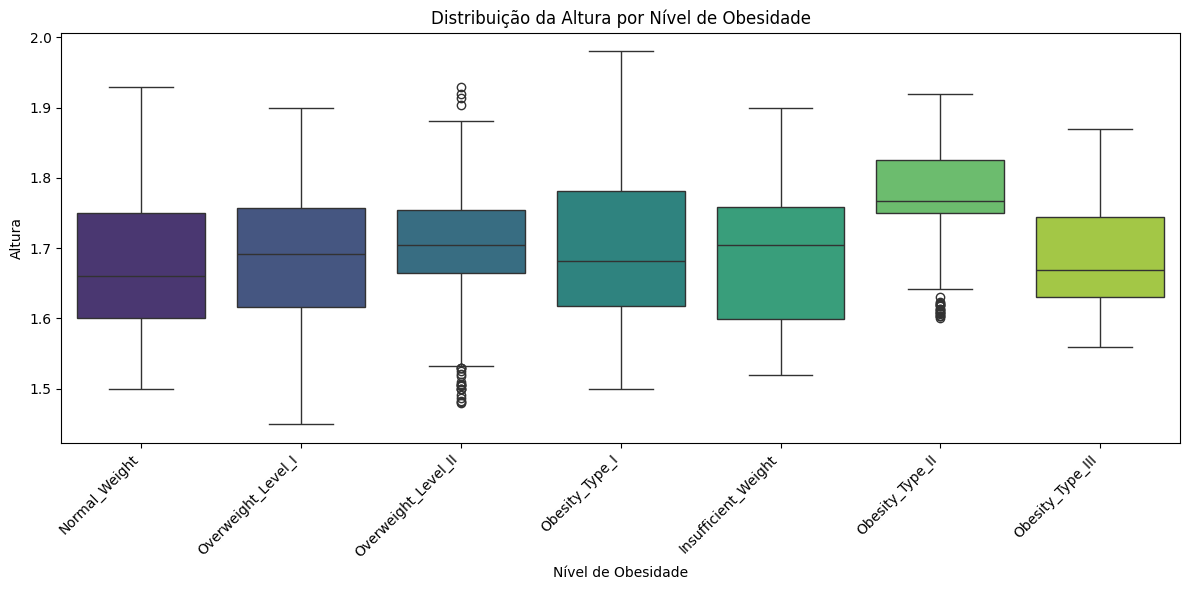

In [ ]:
# Distribuição de 'Height' por nível de 'Obesity'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Obesity', y='Height', palette='viridis', hue='Obesity', legend=False)
plt.title('Distribuição da Altura por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Altura')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

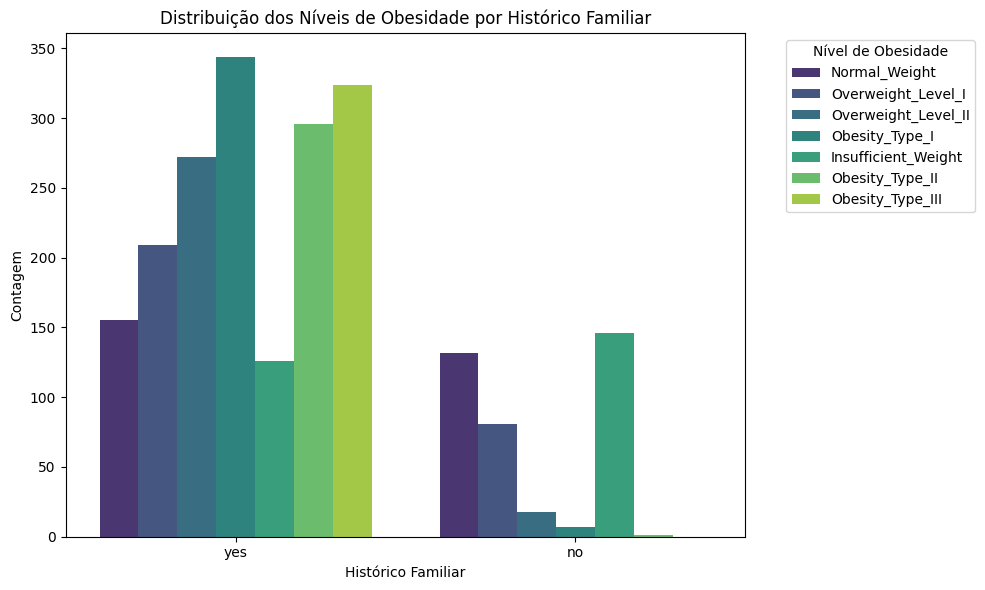

In [ ]:
# Relação entre 'family_history' e 'Obesity'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='family_history', hue='Obesity', palette='viridis')
plt.title('Distribuição dos Níveis de Obesidade por Histórico Familiar')
plt.xlabel('Histórico Familiar')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.legend(title='Nível de Obesidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###*1.3* Análise de correlação e de importância das variáveis (feature importance)

Resumo:

In [ ]:
# A) Codificação das variáveis categóricas
df_encoded = df.copy()
label_encoders = {}
categorical_cols = df_encoded.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

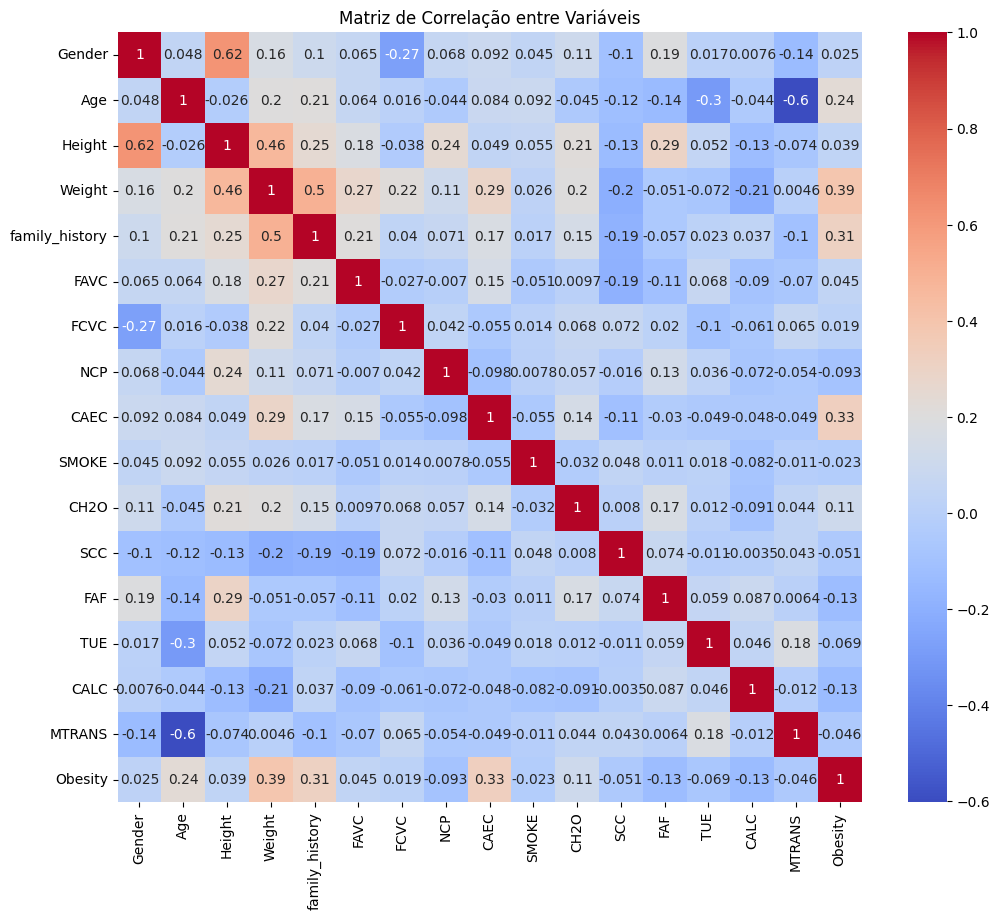

In [ ]:
# C) Matriz de correlação
correlation_matrix = df_encoded.corr()

# Visualização da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

###*1.4* Feature Engineering

Resumo: Criando métricas feats. para endossar o modelo
*texto em itálico*

In [ ]:
# Criar novas features:

# Grupo de Idade (Faixa Etária)
df["age_group"] = pd.cut(df["Age"], bins=[0, 18, 30, 45, 60, 100],
                         labels=["<18", "18-30", "30-45", "45-60", "60+"])

# IMC (Índice de Massa Corporal)
df['BMI'] = df_encoded['Weight'] / (df_encoded['Height'] ** 2)

# Risco Comportamental Total (Score de Maus Hábitos) -- Soma binária de comportamentos associados a maior obesidade:
df["risk_score"] = (
    (df["FAVC"] == "yes").astype(int) +
    (df["CAEC"].isin(["Always", "Frequently"])).astype(int) +
    (df["CALC"] == "Frequently").astype(int) +
    (df["SCC"] == "no").astype(int) +
    (df["SMOKE"] == "yes").astype(int)
)

# Consumo de Água Proporcional ao Peso
df["water_per_kg"] = df["CH2O"] / df["Weight"]

# Delta Atividade Física vs. Sedentarismo
df["active_vs_sedentary"] = df["FAF"] - df["TUE"]

df_new_features = df[[
    "age_group", "BMI", "risk_score",
    "water_per_kg", "active_vs_sedentary", "Obesity"
]].copy()


/tmp/ipython-input-27-2239723543.py:13: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


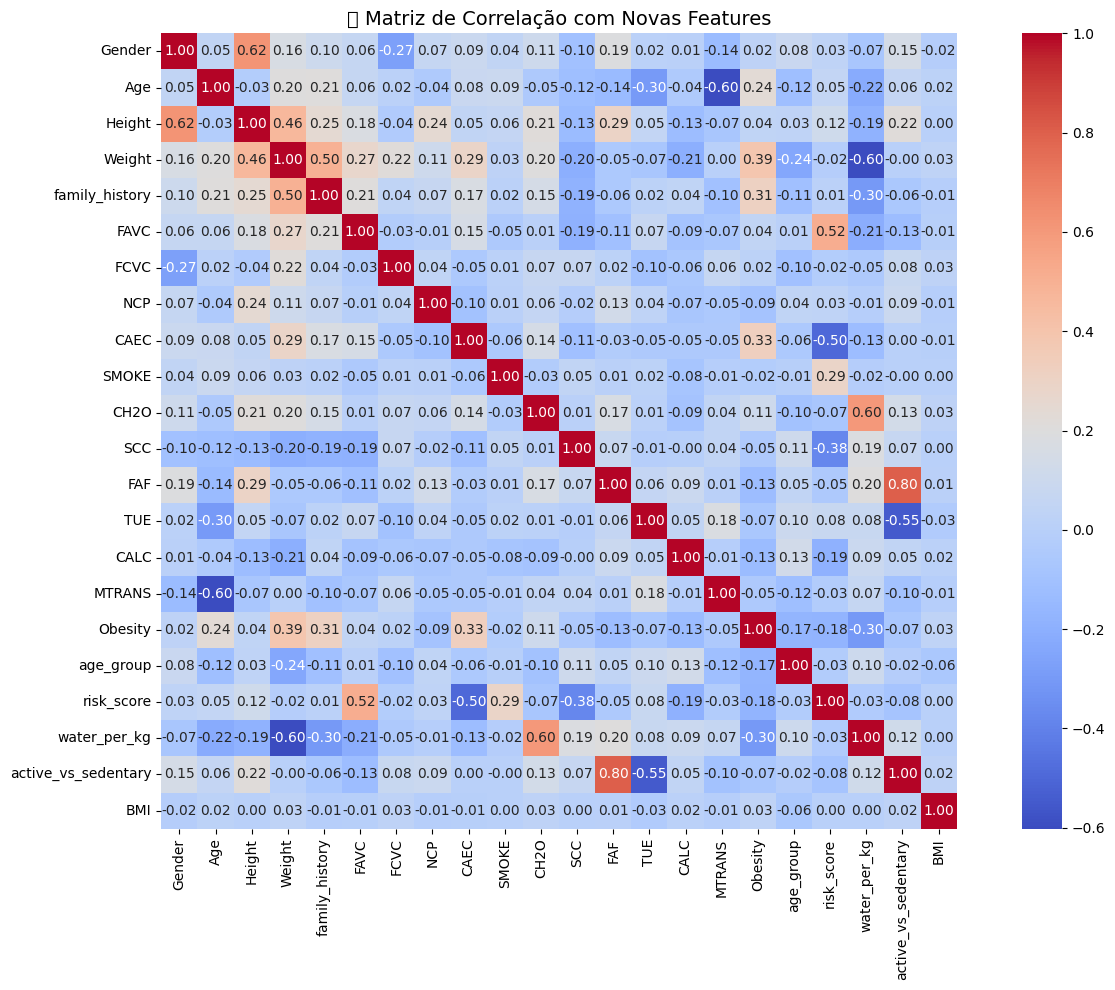

In [ ]:
# Calcular matriz de correlação
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=["object", "category"]).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))


corr_matrix = df_encoded.corr(numeric_only=True)


plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("🔗 Matriz de Correlação com Novas Features", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns)
mi_series.sort_values(ascending=False)


,0
Weight,1.255061
water_per_kg,0.603848
Age,0.567267
Height,0.428702
FCVC,0.370799
active_vs_sedentary,0.344636
FAF,0.293862
CH2O,0.287039
NCP,0.265086
TUE,0.256602


###*1.5* Machine Learning

In [ ]:
# Selecionar todas as colunas, exceto a target
X_all = df_encoded.drop(columns=['Obesity'])
y = df_encoded['Obesity']

# Lista das novas features criadas
novas_features = ['BMI', 'risk_score', 'water_per_kg', 'active_vs_sedentary']

# Criar novo dataset removendo as novas features para comparação
X_base = X_all.drop(columns=novas_features)

In [ ]:
# RandomForest com todas as features
model_all = RandomForestClassifier(random_state=42)
scores_all = cross_val_score(model_all, X_all, y, cv=5, scoring='accuracy')
print("✅ Acurácia média com TODAS as features:", np.mean(scores_all))

# RandomForest sem as novas features
model_base = RandomForestClassifier(random_state=42)
scores_base = cross_val_score(model_base, X_base, y, cv=5, scoring='accuracy')
print("🚫 Acurácia média SEM as novas features:", np.mean(scores_base))


✅ Acurácia média com TODAS as features: 0.9422854133754607
🚫 Acurácia média SEM as novas features: 0.9370878289805387


📊 Top 10 Features mais importantes:


,0
Weight,0.238821
BMI,0.153720
Height,0.076379
water_per_kg,0.075362
FCVC,0.071180
Age,0.064557
Gender,0.054290
CH2O,0.033928
NCP,0.033687
TUE,0.028825


/tmp/ipython-input-40-759612180.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(10), y=importances.head(10).index, palette="viridis")


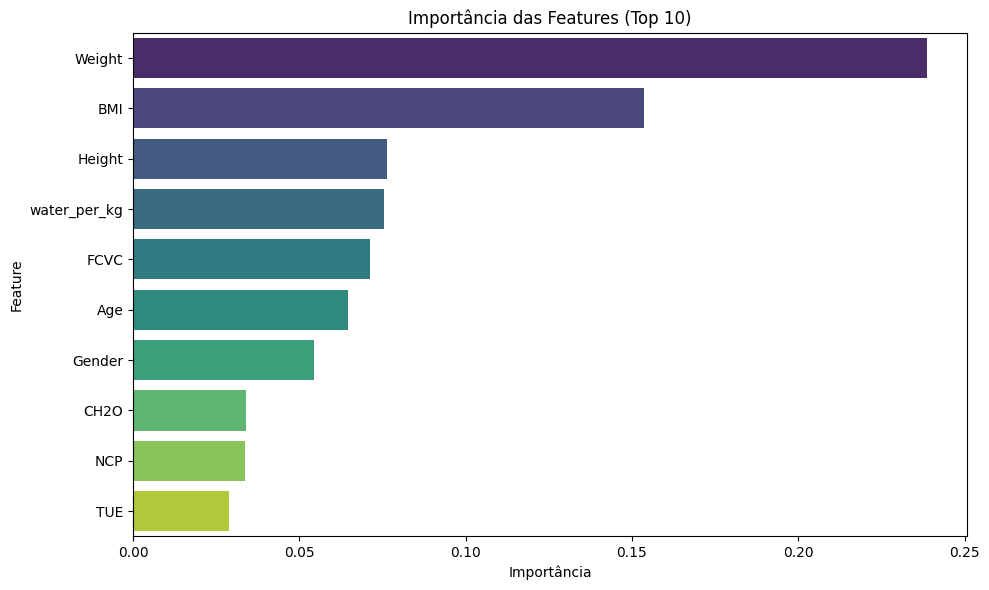

In [ ]:
# Treinar modelo com todas para ver importância
model_all.fit(X_all, y)
importances = pd.Series(model_all.feature_importances_, index=X_all.columns)
importances = importances.sort_values(ascending=False)

# Mostrar as 10 mais importantes
print("📊 Top 10 Features mais importantes:")
display(importances.head(10))

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.head(10), y=importances.head(10).index, palette="viridis")
plt.title("Importância das Features (Top 10)")
plt.xlabel("Importância")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
# Binário para AUC (usando apenas uma classe contra todas) - necessário para multiclasses
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

# Caso o problema tenha mais de duas classes, o scoring='roc_auc_ovr' permite avaliação multi-classe
model_all = RandomForestClassifier(n_estimators=30, random_state=42)
model_base = RandomForestClassifier(n_estimators=30, random_state=42)

# AUC com todas as features
scores_auc_all = cross_val_score(model_all, X_all, y, cv=5, scoring='roc_auc_ovr')
print("✅ AUC média com TODAS as features:", np.mean(scores_auc_all))

# AUC sem as novas features
scores_auc_base = cross_val_score(model_base, X_base, y, cv=5, scoring='roc_auc_ovr')
print("🚫 AUC média SEM as novas features:", np.mean(scores_auc_base))


✅ AUC média com TODAS as features: 0.9946903230350326
🚫 AUC média SEM as novas features: 0.9915587067024164


In [ ]:
# -*- coding: utf-8 -*-
"""
📘 Análise Comparativa de Modelos de Classificação

Este script avalia e compara múltiplos algoritmos de Machine Learning para classificação multiclasse
utilizando a métrica AUC (Área sob a Curva ROC). A avaliação é feita com validação cruzada para maior robustez.

Inclui:
- Cálculo de AUC média
- Cálculo de desvio padrão da AUC
- Ranqueamento por performance e estabilidade
- Score final para ajudar na escolha do modelo ideal

Autor: [Seu Nome]
Data: [Data]
"""

 # 🎯 Etapa 1: Definição dos modelos a serem testados
# Você pode incluir ou remover modelos conforme o tipo de problema.
# Modelos como Naive Bayes ou XGBoost também podem ser facilmente adicionados aqui.
# -------------------------------------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=30),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=30),
    "SVM": SVC(probability=True),  # prob=True necessário para AUC
    "KNN": KNeighborsClassifier()
}


# 🧪 Etapa 2: Validação cruzada com scoring 'roc_auc_ovr'
# Altere o parâmetro `scoring` para usar outras métricas:
# - 'accuracy', 'f1_macro', 'recall_macro', etc.
# Se o seu problema for binário, pode usar 'roc_auc' diretamente.
# -------------------------------------------------------------------
results = []
for name, model in models.items():
    scores = cross_val_score(model, X_all, y, cv=5, scoring='roc_auc_ovr')
    mean_auc = np.mean(scores)     # Média das AUCs nos folds
    std_auc = np.std(scores)       # Desvio padrão — indica estabilidade
    results.append((name, mean_auc, std_auc))


# 📊 Etapa 3: Organização e Ranking dos resultados
# - AUC Média: Quanto maior, melhor.
# - Desvio Padrão: Quanto menor, mais estável é o modelo.
# - Score Final: Soma dos ranks de AUC e estabilidade (menor = melhor).
# Isso te ajuda a balancear performance com consistência.
# -------------------------------------------------------------------
df_results = pd.DataFrame(results, columns=['Modelo', 'AUC Média', 'Desvio Padrão'])

# Cria rankings separados
df_results['Rank AUC'] = df_results['AUC Média'].rank(ascending=False, method='min')
df_results['Rank Estabilidade'] = df_results['Desvio Padrão'].rank(ascending=True, method='min')

# Combinação dos rankings: quanto menor o Score Final, melhor o modelo no geral
df_results['Score Final'] = df_results['Rank AUC'] + df_results['Rank Estabilidade']

# Ordenar os modelos do melhor para o pior com base no score final
df_results = df_results.sort_values(by='Score Final').reset_index(drop=True)


# 📈 Etapa 4: Exibição dos resultados
# O resultado pode ser exportado para CSV ou renderizado em dashboards se necessário.
# Interprete os modelos com menor 'Score Final' como os mais equilibrados entre performance e robustez.
# -------------------------------------------------------------------
print(df_results)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                Modelo  AUC Média  Desvio Padrão  Rank AUC  Rank Estabilidade  \
0        Random Forest   0.995089       0.009158       1.0                2.0   
1                  KNN   0.970570       0.006433       3.0                1.0   
2    Gradient Boosting   0.988859       0.016363       2.0                4.0   
3  Logistic Regression   0.836322       0.012616       5.0                3.0   
4        Decision Tree   0.961152       0.020157       4.0                5.0   
5                  SVM   0.707815       0.032829       6.0                6.0   

   Score Final  
0          3.0  
1          4.0  
2          6.0  
3          8.0  
4          9.0  
5         12.0  


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import numpy as np

# Exemplo com o melhor modelo identificado (pode trocar por outro)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# K-fold estratificado
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Listas para armazenar os resultados por fold
acc_scores, f1_scores, auc_scores = [], [], []

# Loop manual nos folds
for train_index, val_index in skf.split(X_all, y):
    X_train, X_val = X_all.iloc[train_index], X_all.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Prever
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)

    # Calcular métricas
    acc_scores.append(accuracy_score(y_val, y_pred))
    f1_scores.append(f1_score(y_val, y_pred, average='macro'))  # média entre classes
    auc_scores.append(roc_auc_score(pd.get_dummies(y_val), y_proba, multi_class='ovr'))

# Mostrar resultados agregados
print(f"Acurácia Média: {np.mean(acc_scores):.4f} ± {np.std(acc_scores):.4f}")
print(f"F1-Score Médio: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"AUC Médio: {np.mean(auc_scores):.4f} ± {np.std(auc_scores):.4f}")


Acurácia Média: 0.9578 ± 0.0135
F1-Score Médio: 0.9568 ± 0.0136
AUC Médio: 0.9982 ± 0.0008


/tmp/ipython-input-56-1792948115.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df.head(15), palette="viridis")


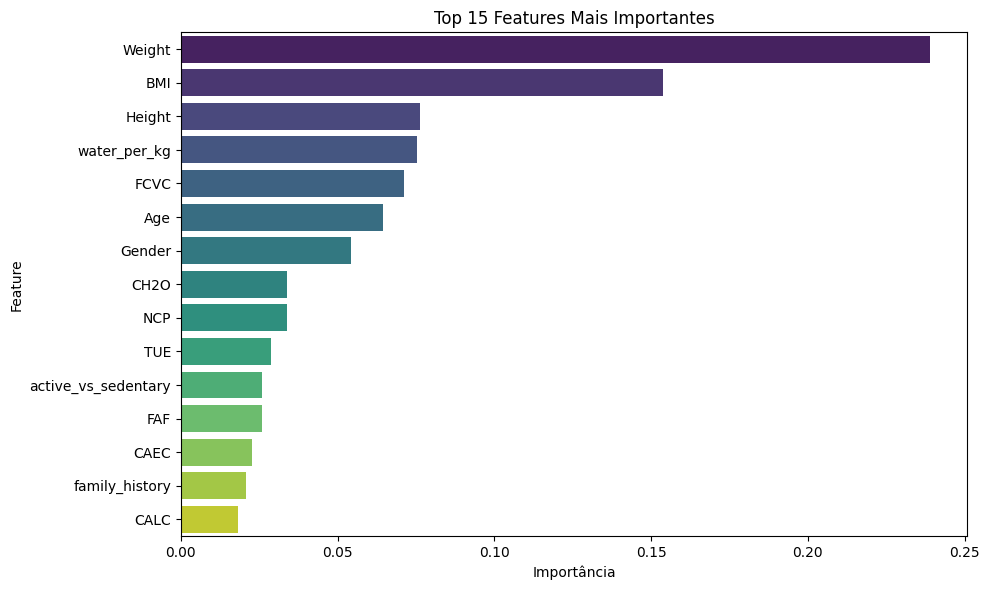

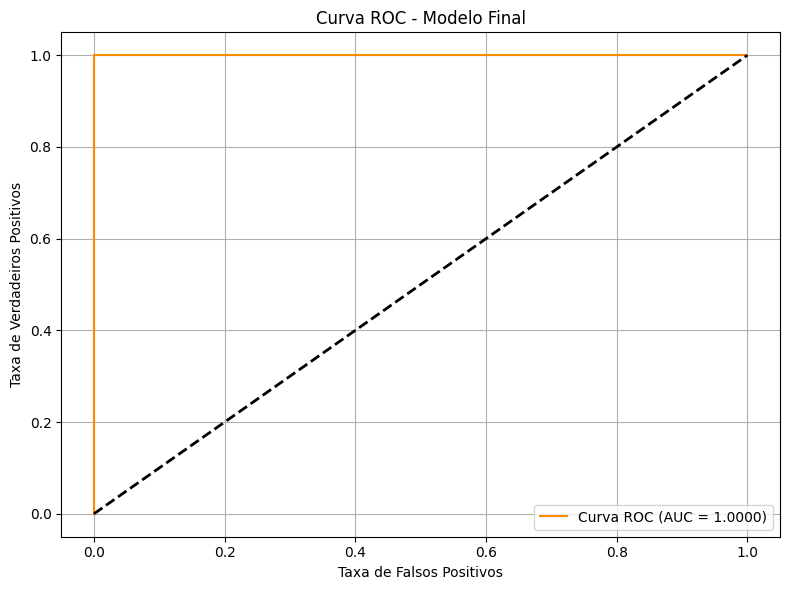

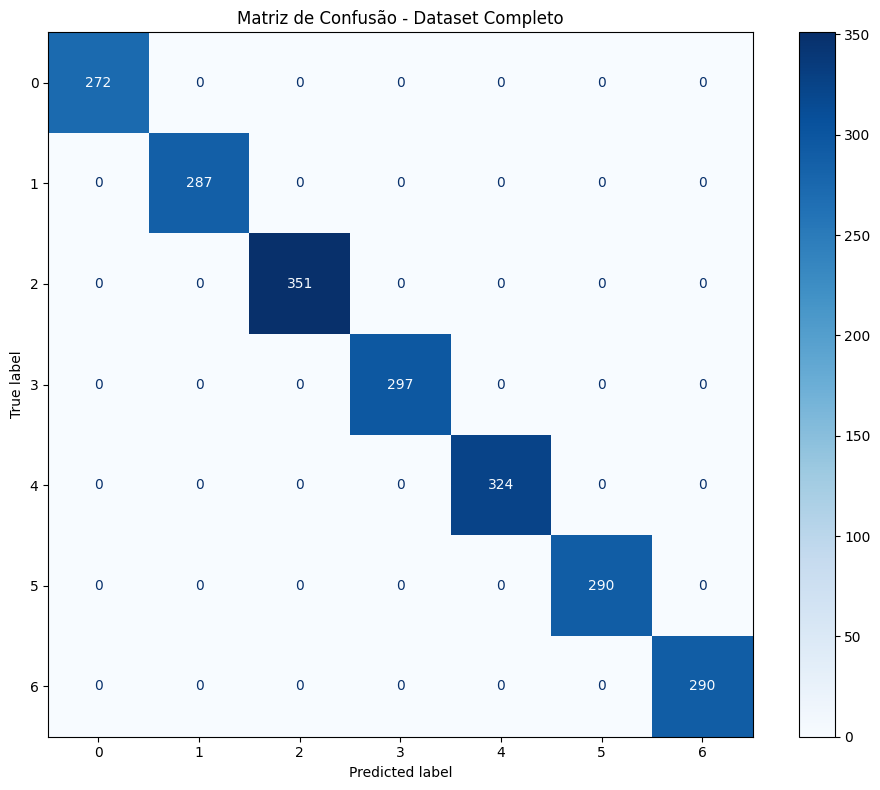

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Supondo que 'model' já foi treinado (ex: RandomForestClassifier)
model.fit(X_all, y)

# 1. 🔎 Importância das Features
importances = model.feature_importances_
feature_names = X_all.columns
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualização das top 15 features mais importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15), palette="viridis")
plt.title("Top 15 Features Mais Importantes")
plt.xlabel("Importância")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 2. 📉 Curva ROC Média (multiclasse)
y_bin = LabelBinarizer().fit_transform(y)
y_proba = model.predict_proba(X_all)
fpr, tpr, _ = roc_curve(y_bin.ravel(), y_proba.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f"Curva ROC (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC - Modelo Final")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. 📊 Matriz de Confusão
y_pred = model.predict(X_all)
cm = confusion_matrix(y, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues')
plt.title("Matriz de Confusão - Dataset Completo")
plt.tight_layout()
plt.show()


In [7]:
import joblib
import os

os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/modelo_obesidade.pkl")

ModuleNotFoundError: No module named 'joblib'

In [2]:
import joblib
import os

# Cria diretório de modelos se não existir
os.makedirs("models", exist_ok=True)

# Salva modelo treinado
joblib.dump(model, "models/modelo_obesidade.pkl")

print("✅ Modelo salvo com sucesso em: models/modelo_obesidade.pkl")


ModuleNotFoundError: No module named 'joblib'